## Import all the lib

In [1]:
# get all the imports
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, BatchNormalization
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras import optimizers

import tensorflow as tf

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Using TensorFlow backend.
/Users/batman/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Read the data

- change the directory if needed
- read the file using the pandas and process the data to get the final data set

In [5]:
cd Data 

[Errno 2] No such file or directory: 'stock'
/Users/batman/Documents/stock


#### Read the data and process it

In [6]:
#  for apple
# read the file
apple=pd.read_csv('AppleFinalData.csv')
# rename the column
apple=apple.rename(columns={'Adj Close':'Price'})
# drop the extra column
apple=apple.drop('Close',axis=1)
# add blank column
apple['Month']=int
# add the data into the month column
for i in range(len(apple)):
  apple['Month'][i]=int(apple['Date'][i].split('-')[1])
# change the column order
apple=apple[['Open', 'High', 'Low', 'compound', 'neg', 'neu', 'pos','Month','Date','Price']]
# check the final columns
apple.columns

/Users/batman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Index(['Open', 'High', 'Low', 'compound', 'neg', 'neu', 'pos', 'Month', 'Date',
       'Price'],
      dtype='object')

#### Read the data ans process it

In [9]:
#  for apple
# read the file
micro=pd.read_csv('MicrosoftFinalData.csv')
# rename the column
micro=micro.rename(columns={'Adj Close':'Price'})
# drop the extra column
micro=micro.drop('Close',axis=1)
# add blank column
micro['Month']=int
# add the data into the month column
for i in range(len(apple)):
  micro['Month'][i]=int(micro['Date'][i].split('-')[1])
# change the column order
micro=micro[['Open', 'High', 'Low', 'compound', 'neg', 'neu', 'pos','Month','Date','Price']]
# check the final columns
micro.columns

/Users/batman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Index(['Open', 'High', 'Low', 'compound', 'neg', 'neu', 'pos', 'Month', 'Date',
       'Price'],
      dtype='object')

#### Seperate NEWS and Stock data

In [12]:
# seperate the data into stock and the news data
a_stock=apple.iloc[:,:3].values
a_news=apple.iloc[0:,3:7].values

m_stock=micro.iloc[:,:3].values
m_news=micro.iloc[0:,3:7].values

#### Normalize the stock data

In [13]:
# Normalizarion
for i in range (len(a_stock[0])):
    a_stock[:,i]=(a_stock[:,i]-np.min(a_stock[:,i]))/(np.max(a_stock[:,i])-np.min(a_stock[:,i]))

for i in range (len(m_stock[0])):
    m_stock[:,i]=(m_stock[:,i]-np.min(m_stock[:,i]))/(np.max(m_stock[:,i])-np.min(m_stock[:,i]))


#### Polymerise the stock values only

In [14]:
# import sklearn
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
a_stock=poly.fit_transform(a_stock)
m_stock=poly.fit_transform(m_stock)

#### Make the training and testing data by combining the stock and news

In [16]:
# for apple
a_train_x= np.hstack([a_stock[:2033,:],a_news[:2033]])
a_train_y= apple.iloc[:2033,9:].values
a_test_x= np.hstack([a_stock[2033:,:],a_news[2033:]])
a_test_y= apple.iloc[2033:,9:].values

#  for microsoft
m_train_x= np.hstack([m_stock[:2033,:],m_news[:2033]])
m_train_y= micro.iloc[:2033,9:].values
m_test_x= np.hstack([m_stock[2033:,:],m_news[2033:]])
m_test_y= micro.iloc[2033:,9:].values

## Make the model


### Apple benchmark

In [55]:
# make model
a_model=Sequential()
# layer 1
a_model.add(Dense(1,input_shape=a_train_x.shape[1:],activation='linear' ))
# optimizer if needed
opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)
# compile the model
a_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# to make the log of the data collected while training to see in the tensor board
time=datetime.now()
tbCallBack = keras.callbacks.TensorBoard(log_dir='/log/benchmark_apple'+str(time), write_graph=True)
# to create the check points of the weights based on the best validation los
filepath="Weights/benchmark_apple.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint,tbCallBack]

In [56]:
# confirm the model structure
a_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 25        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [57]:
a_model.fit(
         a_train_x
        ,a_train_y
        , epochs=240
        ,batch_size=50
        ,verbose=1
        ,validation_split=0.1 
        ,callbacks=callbacks_list
        )



Train on 1829 samples, validate on 204 samples
Epoch 1/240
1829/1829 [==============================] - 0s 121us/step - loss: 2496.2437 - acc: 0.0000e+00 - val_loss: 9343.6537 - val_acc: 0.0000e+00
Epoch 2/240
1829/1829 [==============================] - 0s 83us/step - loss: 2475.5154 - acc: 0.0000e+00 - val_loss: 9260.3351 - val_acc: 0.0000e+00
Epoch 3/240
1829/1829 [==============================] - 0s 62us/step - loss: 2454.9311 - acc: 0.0000e+00 - val_loss: 9174.8719 - val_acc: 0.0000e+00
Epoch 4/240
1829/1829 [==============================] - 0s 89us/step - loss: 2434.3855 - acc: 0.0000e+00 - val_loss: 9091.2551 - val_acc: 0.0000e+00
Epoch 5/240
1829/1829 [==============================] - 0s 61us/step - loss: 2414.0037 - acc: 0.0000e+00 - val_loss: 9007.4421 - val_acc: 0.0000e+00
Epoch 6/240
1829/1829 [==============================] - 0s 65us/step - loss: 2393.5981 - acc: 0.0000e+00 - val_loss: 8925.3662 - val_acc: 0.0000e+00
Epoch 7/240
1829/1829 [=============================

1829/1829 [==============================] - 0s 60us/step - loss: 2050.7356 - acc: 0.0000e+00 - val_loss: 7528.0235 - val_acc: 0.0000e+00
Epoch 25/240
1829/1829 [==============================] - 0s 49us/step - loss: 2032.8259 - acc: 0.0000e+00 - val_loss: 7454.6293 - val_acc: 0.0000e+00
Epoch 26/240
1829/1829 [==============================] - 0s 59us/step - loss: 2015.0175 - acc: 0.0000e+00 - val_loss: 7381.9622 - val_acc: 0.0000e+00
Epoch 27/240
1829/1829 [==============================] - 0s 60us/step - loss: 1997.2619 - acc: 0.0000e+00 - val_loss: 7309.8892 - val_acc: 0.0000e+00
Epoch 28/240
1829/1829 [==============================] - 0s 54us/step - loss: 1979.6775 - acc: 0.0000e+00 - val_loss: 7238.9594 - val_acc: 0.0000e+00
Epoch 29/240
1829/1829 [==============================] - 0s 63us/step - loss: 1962.2748 - acc: 0.0000e+00 - val_loss: 7168.4218 - val_acc: 0.0000e+00
Epoch 30/240
1829/1829 [==============================] - 0s 53us/step - loss: 1944.9752 - acc: 0.0000e+00 

Epoch 48/240
1829/1829 [==============================] - 0s 59us/step - loss: 1650.9274 - acc: 0.0000e+00 - val_loss: 5906.1221 - val_acc: 0.0000e+00
Epoch 49/240
1829/1829 [==============================] - 0s 49us/step - loss: 1635.6098 - acc: 0.0000e+00 - val_loss: 5844.3884 - val_acc: 0.0000e+00
Epoch 50/240
1829/1829 [==============================] - 0s 49us/step - loss: 1620.4132 - acc: 0.0000e+00 - val_loss: 5782.6210 - val_acc: 0.0000e+00
Epoch 51/240
1829/1829 [==============================] - 0s 55us/step - loss: 1605.2737 - acc: 0.0000e+00 - val_loss: 5721.5868 - val_acc: 0.0000e+00
Epoch 52/240
1829/1829 [==============================] - 0s 60us/step - loss: 1590.2126 - acc: 0.0000e+00 - val_loss: 5660.8332 - val_acc: 0.0000e+00
Epoch 53/240
1829/1829 [==============================] - 0s 54us/step - loss: 1575.2705 - acc: 0.0000e+00 - val_loss: 5600.6357 - val_acc: 0.0000e+00
Epoch 54/240
1829/1829 [==============================] - 0s 50us/step - loss: 1560.4286 - acc

1829/1829 [==============================] - 0s 56us/step - loss: 1322.1891 - acc: 0.0000e+00 - val_loss: 4582.0113 - val_acc: 0.0000e+00
Epoch 72/240
1829/1829 [==============================] - 0s 58us/step - loss: 1309.0181 - acc: 0.0000e+00 - val_loss: 4528.9165 - val_acc: 0.0000e+00
Epoch 73/240
1829/1829 [==============================] - 0s 58us/step - loss: 1295.9301 - acc: 0.0000e+00 - val_loss: 4476.2795 - val_acc: 0.0000e+00
Epoch 74/240
1829/1829 [==============================] - 0s 59us/step - loss: 1282.8674 - acc: 0.0000e+00 - val_loss: 4425.1529 - val_acc: 0.0000e+00
Epoch 75/240
1829/1829 [==============================] - 0s 49us/step - loss: 1269.9991 - acc: 0.0000e+00 - val_loss: 4372.9252 - val_acc: 0.0000e+00
Epoch 76/240
1829/1829 [==============================] - 0s 51us/step - loss: 1257.1471 - acc: 0.0000e+00 - val_loss: 4321.5320 - val_acc: 0.0000e+00
Epoch 77/240
1829/1829 [==============================] - 0s 56us/step - loss: 1244.3844 - acc: 0.0000e+00 

Epoch 95/240
1829/1829 [==============================] - 0s 53us/step - loss: 1029.3601 - acc: 0.0000e+00 - val_loss: 3413.6189 - val_acc: 0.0000e+00
Epoch 96/240
1829/1829 [==============================] - 0s 67us/step - loss: 1018.2095 - acc: 0.0000e+00 - val_loss: 3369.7182 - val_acc: 0.0000e+00
Epoch 97/240
1829/1829 [==============================] - 0s 50us/step - loss: 1007.1298 - acc: 0.0000e+00 - val_loss: 3325.4271 - val_acc: 0.0000e+00
Epoch 98/240
1829/1829 [==============================] - 0s 57us/step - loss: 996.1120 - acc: 0.0000e+00 - val_loss: 3282.1647 - val_acc: 0.0000e+00
Epoch 99/240
1829/1829 [==============================] - 0s 55us/step - loss: 985.2584 - acc: 0.0000e+00 - val_loss: 3238.3220 - val_acc: 0.0000e+00
Epoch 100/240
1829/1829 [==============================] - 0s 56us/step - loss: 974.3772 - acc: 0.0000e+00 - val_loss: 3196.2397 - val_acc: 0.0000e+00
Epoch 101/240
1829/1829 [==============================] - 0s 50us/step - loss: 963.7032 - acc: 

1829/1829 [==============================] - 0s 52us/step - loss: 792.9092 - acc: 0.0000e+00 - val_loss: 2482.1973 - val_acc: 0.0000e+00
Epoch 119/240
1829/1829 [==============================] - 0s 54us/step - loss: 783.5653 - acc: 0.0000e+00 - val_loss: 2445.6928 - val_acc: 0.0000e+00
Epoch 120/240
1829/1829 [==============================] - 0s 59us/step - loss: 774.3012 - acc: 0.0000e+00 - val_loss: 2408.9430 - val_acc: 0.0000e+00
Epoch 121/240
1829/1829 [==============================] - 0s 61us/step - loss: 765.0469 - acc: 0.0000e+00 - val_loss: 2373.2172 - val_acc: 0.0000e+00
Epoch 122/240
1829/1829 [==============================] - 0s 68us/step - loss: 755.9536 - acc: 0.0000e+00 - val_loss: 2337.4128 - val_acc: 0.0000e+00
Epoch 123/240
1829/1829 [==============================] - 0s 60us/step - loss: 746.9010 - acc: 0.0000e+00 - val_loss: 2302.3335 - val_acc: 0.0000e+00
Epoch 124/240
1829/1829 [==============================] - 0s 161us/step - loss: 737.9272 - acc: 0.0000e+00 

Epoch 142/240
1829/1829 [==============================] - 0s 82us/step - loss: 589.0902 - acc: 0.0000e+00 - val_loss: 1693.3994 - val_acc: 0.0000e+00
Epoch 143/240
1829/1829 [==============================] - 0s 62us/step - loss: 581.4959 - acc: 0.0000e+00 - val_loss: 1664.4231 - val_acc: 0.0000e+00
Epoch 144/240
1829/1829 [==============================] - 0s 96us/step - loss: 573.9835 - acc: 0.0000e+00 - val_loss: 1636.0758 - val_acc: 0.0000e+00
Epoch 145/240
1829/1829 [==============================] - 0s 135us/step - loss: 566.5521 - acc: 0.0000e+00 - val_loss: 1607.7377 - val_acc: 0.0000e+00
Epoch 146/240
1829/1829 [==============================] - 0s 84us/step - loss: 559.1587 - acc: 0.0000e+00 - val_loss: 1579.3386 - val_acc: 0.0000e+00
Epoch 147/240
1829/1829 [==============================] - 0s 81us/step - loss: 551.8333 - acc: 0.0000e+00 - val_loss: 1551.5098 - val_acc: 0.0000e+00
Epoch 148/240
1829/1829 [==============================] - 0s 86us/step - loss: 544.5709 - ac

1829/1829 [==============================] - 0s 64us/step - loss: 432.2457 - acc: 0.0000e+00 - val_loss: 1102.8567 - val_acc: 0.0000e+00
Epoch 166/240
1829/1829 [==============================] - 0s 98us/step - loss: 426.2486 - acc: 0.0000e+00 - val_loss: 1080.7482 - val_acc: 0.0000e+00
Epoch 167/240
1829/1829 [==============================] - 0s 64us/step - loss: 420.3067 - acc: 0.0000e+00 - val_loss: 1059.0505 - val_acc: 0.0000e+00
Epoch 168/240
1829/1829 [==============================] - 0s 106us/step - loss: 414.4692 - acc: 0.0000e+00 - val_loss: 1037.3549 - val_acc: 0.0000e+00
Epoch 169/240
1829/1829 [==============================] - 0s 59us/step - loss: 408.6420 - acc: 0.0000e+00 - val_loss: 1016.3258 - val_acc: 0.0000e+00
Epoch 170/240
1829/1829 [==============================] - 0s 83us/step - loss: 402.9194 - acc: 0.0000e+00 - val_loss: 995.2535 - val_acc: 0.0000e+00
Epoch 171/240
1829/1829 [==============================] - 0s 83us/step - loss: 397.2739 - acc: 0.0000e+00 -

1829/1829 [==============================] - 0s 91us/step - loss: 310.6594 - acc: 0.0000e+00 - val_loss: 664.3681 - val_acc: 0.0000e+00
Epoch 189/240
1829/1829 [==============================] - 0s 122us/step - loss: 306.1163 - acc: 0.0000e+00 - val_loss: 648.6640 - val_acc: 0.0000e+00
Epoch 190/240
1829/1829 [==============================] - 0s 80us/step - loss: 301.6678 - acc: 0.0000e+00 - val_loss: 633.0374 - val_acc: 0.0000e+00
Epoch 191/240
1829/1829 [==============================] - 0s 126us/step - loss: 297.2406 - acc: 0.0000e+00 - val_loss: 617.8125 - val_acc: 0.0000e+00
Epoch 192/240
1829/1829 [==============================] - 0s 62us/step - loss: 292.8896 - acc: 0.0000e+00 - val_loss: 602.9497 - val_acc: 0.0000e+00
Epoch 193/240
1829/1829 [==============================] - 0s 94us/step - loss: 288.5993 - acc: 0.0000e+00 - val_loss: 588.3604 - val_acc: 0.0000e+00
Epoch 194/240
1829/1829 [==============================] - 0s 159us/step - loss: 284.3722 - acc: 0.0000e+00 - va

Epoch 212/240
1829/1829 [==============================] - 0s 257us/step - loss: 217.7817 - acc: 0.0000e+00 - val_loss: 354.1751 - val_acc: 0.0000e+00
Epoch 213/240
1829/1829 [==============================] - 0s 148us/step - loss: 214.5918 - acc: 0.0000e+00 - val_loss: 344.3909 - val_acc: 0.0000e+00
Epoch 214/240
1829/1829 [==============================] - 0s 168us/step - loss: 211.4771 - acc: 0.0000e+00 - val_loss: 334.7556 - val_acc: 0.0049
Epoch 215/240
1829/1829 [==============================] - 0s 198us/step - loss: 208.4246 - acc: 0.0000e+00 - val_loss: 325.2369 - val_acc: 0.0049
Epoch 216/240
1829/1829 [==============================] - 0s 151us/step - loss: 205.3952 - acc: 0.0000e+00 - val_loss: 315.9666 - val_acc: 0.0000e+00
Epoch 217/240
1829/1829 [==============================] - 0s 79us/step - loss: 202.4359 - acc: 0.0000e+00 - val_loss: 306.8725 - val_acc: 0.0000e+00
Epoch 218/240
1829/1829 [==============================] - 0s 127us/step - loss: 199.4999 - acc: 0.0000

Epoch 236/240
1829/1829 [==============================] - 0s 68us/step - loss: 154.9765 - acc: 0.0000e+00 - val_loss: 176.3732 - val_acc: 0.0049
Epoch 237/240
1829/1829 [==============================] - 0s 56us/step - loss: 152.9342 - acc: 0.0000e+00 - val_loss: 171.4481 - val_acc: 0.0098
Epoch 238/240
1829/1829 [==============================] - 0s 43us/step - loss: 150.9160 - acc: 0.0000e+00 - val_loss: 166.7722 - val_acc: 0.0049
Epoch 239/240
1829/1829 [==============================] - 0s 44us/step - loss: 148.9495 - acc: 0.0000e+00 - val_loss: 162.2161 - val_acc: 0.0049
Epoch 240/240
1829/1829 [==============================] - 0s 82us/step - loss: 147.0006 - acc: 0.0000e+00 - val_loss: 157.9561 - val_acc: 0.0000e+00


#### Use checkpoint weights

if the model have got better result during the training than that of the end use this code to use that saved checkpoint data

In [ ]:
from keras.models import load_model
a_model=load_model('Weights/benchmark_apple.best.hdf5')

#### Predict the data on the testing data set

In [58]:
a_predict_train=a_model.predict(a_train_x)
a_predict_test=a_model.predict(a_test_x)

#### calculate the score of the model using the relative error formula

In [59]:
a_score=(abs(a_predict_test-a_test_y)/a_test_y).sum()
a_score

44.320222294320786

### Plot the final results

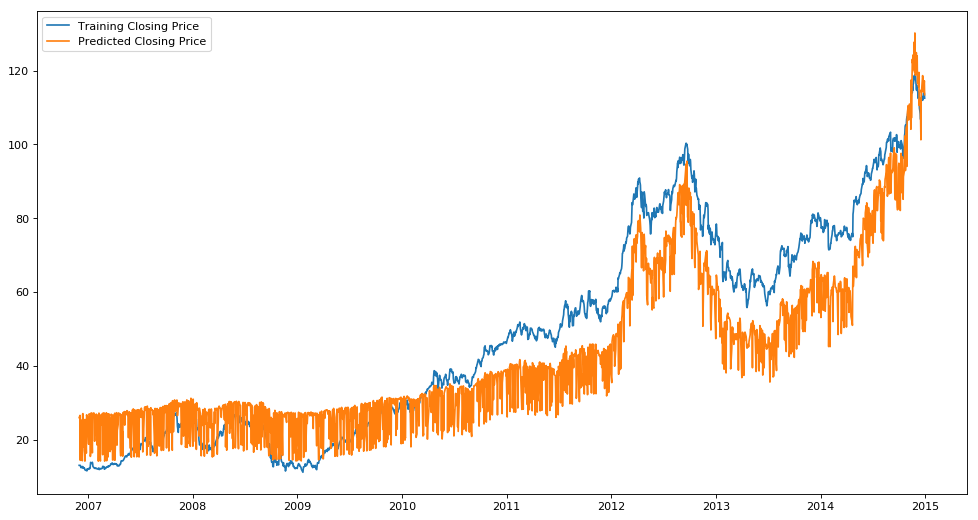

In [60]:
%matplotlib inline
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')

index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in apple['Date']]

plt.plot(index[:2033] ,a_train_y, label='Training Closing Price')
plt.plot(index[:2033] ,a_predict_train, label='Predicted Closing Price')
plt.legend()
_ = plt.ylim()

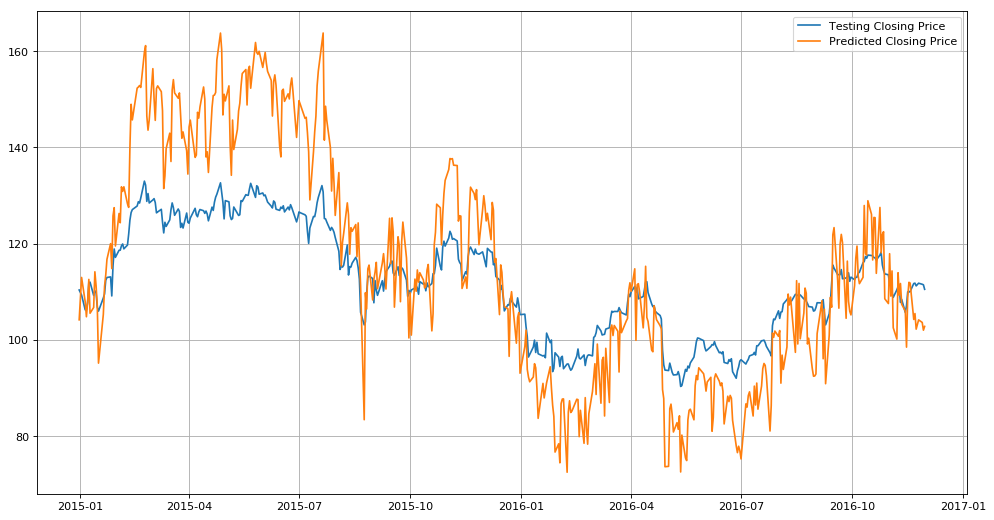

In [132]:
%matplotlib inline
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(index[2033:] ,a_test_y, label='Testing Closing Price')
plt.plot(index[2033:] ,a_predict_test, label='Predicted Closing Price')
plt.grid()
plt.legend()
_ = plt.ylim()

### Microsoft Benchmark

In [125]:
# make model
m_model=Sequential()

# layer 1
m_model.add(Dense(1,input_shape=m_train_x.shape[1:],activation='linear' ))
# optimizer if needed
opt=keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, decay=0.0)
# compile the model
m_model.compile(optimizer=opt, loss='mean_squared_error',metrics=['accuracy'])
# to make the log of the data collected while training to see in the tensor board
time=datetime.now()
tbCallBack = keras.callbacks.TensorBoard(log_dir='/log/benchmark_microsoft'+str(time), write_graph=True)
# to create the check points of the weights based on the best validation los
filepath="Weights/benchmark_micro.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint,tbCallBack]

In [126]:
# confirm the model structure
m_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 25        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [127]:
m_model.fit(
         m_train_x
        ,m_train_y
        , epochs=240
        ,batch_size=50
        ,verbose=1
        ,validation_split=0.1 
        ,callbacks=callbacks_list
        )



Train on 1829 samples, validate on 204 samples
Epoch 1/240
1829/1829 [==============================] - 0s 199us/step - loss: 817.8951 - acc: 0.0000e+00 - val_loss: 1810.3729 - val_acc: 0.0000e+00
Epoch 2/240
1829/1829 [==============================] - 0s 53us/step - loss: 772.3048 - acc: 0.0000e+00 - val_loss: 1668.9786 - val_acc: 0.0000e+00
Epoch 3/240
1829/1829 [==============================] - 0s 57us/step - loss: 728.6031 - acc: 0.0000e+00 - val_loss: 1535.9205 - val_acc: 0.0000e+00
Epoch 4/240
1829/1829 [==============================] - 0s 62us/step - loss: 686.8650 - acc: 0.0000e+00 - val_loss: 1409.9329 - val_acc: 0.0000e+00
Epoch 5/240
1829/1829 [==============================] - 0s 64us/step - loss: 647.0086 - acc: 0.0000e+00 - val_loss: 1290.9993 - val_acc: 0.0000e+00
Epoch 6/240
1829/1829 [==============================] - 0s 45us/step - loss: 609.0050 - acc: 0.0000e+00 - val_loss: 1179.7305 - val_acc: 0.0000e+00
Epoch 7/240
1829/1829 [==============================] - 0

1829/1829 [==============================] - 0s 49us/step - loss: 177.6402 - acc: 0.0000e+00 - val_loss: 116.7231 - val_acc: 0.0000e+00
Epoch 25/240
1829/1829 [==============================] - 0s 53us/step - loss: 164.6345 - acc: 0.0000e+00 - val_loss: 96.9395 - val_acc: 0.0000e+00
Epoch 26/240
1829/1829 [==============================] - 0s 56us/step - loss: 152.5126 - acc: 0.0000e+00 - val_loss: 79.8079 - val_acc: 0.0000e+00
Epoch 27/240
1829/1829 [==============================] - 0s 54us/step - loss: 141.1822 - acc: 0.0000e+00 - val_loss: 65.3872 - val_acc: 0.0000e+00
Epoch 28/240
1829/1829 [==============================] - 0s 47us/step - loss: 130.6392 - acc: 0.0000e+00 - val_loss: 53.4170 - val_acc: 0.0000e+00
Epoch 29/240
1829/1829 [==============================] - 0s 61us/step - loss: 120.8177 - acc: 0.0000e+00 - val_loss: 43.7462 - val_acc: 0.0049
Epoch 30/240
1829/1829 [==============================] - 0s 48us/step - loss: 111.7114 - acc: 0.0000e+00 - val_loss: 36.1782 - 

1829/1829 [==============================] - 0s 40us/step - loss: 24.8151 - acc: 0.0022 - val_loss: 135.0509 - val_acc: 0.0000e+00
Epoch 52/240
1829/1829 [==============================] - 0s 55us/step - loss: 23.5177 - acc: 0.0022 - val_loss: 143.5966 - val_acc: 0.0000e+00
Epoch 53/240
1829/1829 [==============================] - 0s 43us/step - loss: 22.3383 - acc: 0.0016 - val_loss: 151.7703 - val_acc: 0.0000e+00
Epoch 54/240
1829/1829 [==============================] - 0s 45us/step - loss: 21.2716 - acc: 0.0016 - val_loss: 159.9547 - val_acc: 0.0000e+00
Epoch 55/240
1829/1829 [==============================] - 0s 45us/step - loss: 20.2934 - acc: 0.0022 - val_loss: 167.7990 - val_acc: 0.0000e+00
Epoch 56/240
1829/1829 [==============================] - 0s 44us/step - loss: 19.3971 - acc: 0.0022 - val_loss: 175.1247 - val_acc: 0.0000e+00
Epoch 57/240
1829/1829 [==============================] - 0s 46us/step - loss: 18.5883 - acc: 0.0016 - val_loss: 182.5227 - val_acc: 0.0000e+00
Epoch

1829/1829 [==============================] - 0s 46us/step - loss: 9.0619 - acc: 0.0027 - val_loss: 266.6755 - val_acc: 0.0000e+00
Epoch 83/240
1829/1829 [==============================] - 0s 53us/step - loss: 8.8543 - acc: 0.0033 - val_loss: 267.2175 - val_acc: 0.0000e+00
Epoch 84/240
1829/1829 [==============================] - 0s 38us/step - loss: 8.6522 - acc: 0.0033 - val_loss: 267.0447 - val_acc: 0.0000e+00
Epoch 85/240
1829/1829 [==============================] - 0s 43us/step - loss: 8.4552 - acc: 0.0038 - val_loss: 267.0337 - val_acc: 0.0000e+00
Epoch 86/240
1829/1829 [==============================] - 0s 41us/step - loss: 8.2631 - acc: 0.0044 - val_loss: 266.8524 - val_acc: 0.0000e+00
Epoch 87/240
1829/1829 [==============================] - 0s 44us/step - loss: 8.0766 - acc: 0.0044 - val_loss: 266.0161 - val_acc: 0.0000e+00
Epoch 88/240
1829/1829 [==============================] - 0s 44us/step - loss: 7.8931 - acc: 0.0044 - val_loss: 265.8149 - val_acc: 0.0000e+00
Epoch 89/240

Epoch 113/240
1829/1829 [==============================] - 0s 41us/step - loss: 4.3791 - acc: 0.0071 - val_loss: 224.1647 - val_acc: 0.0000e+00
Epoch 114/240
1829/1829 [==============================] - 0s 44us/step - loss: 4.2699 - acc: 0.0071 - val_loss: 221.5089 - val_acc: 0.0000e+00
Epoch 115/240
1829/1829 [==============================] - 0s 39us/step - loss: 4.1617 - acc: 0.0066 - val_loss: 219.4999 - val_acc: 0.0000e+00
Epoch 116/240
1829/1829 [==============================] - 0s 41us/step - loss: 4.0566 - acc: 0.0066 - val_loss: 216.9559 - val_acc: 0.0000e+00
Epoch 117/240
1829/1829 [==============================] - 0s 40us/step - loss: 3.9521 - acc: 0.0060 - val_loss: 214.0468 - val_acc: 0.0000e+00
Epoch 118/240
1829/1829 [==============================] - 0s 44us/step - loss: 3.8492 - acc: 0.0060 - val_loss: 211.6467 - val_acc: 0.0000e+00
Epoch 119/240
1829/1829 [==============================] - 0s 41us/step - loss: 3.7498 - acc: 0.0060 - val_loss: 208.3496 - val_acc: 0.0

Epoch 144/240
1829/1829 [==============================] - 0s 38us/step - loss: 1.7810 - acc: 0.0060 - val_loss: 138.0704 - val_acc: 0.0000e+00
Epoch 145/240
1829/1829 [==============================] - 0s 42us/step - loss: 1.7239 - acc: 0.0060 - val_loss: 135.3089 - val_acc: 0.0000e+00
Epoch 146/240
1829/1829 [==============================] - 0s 42us/step - loss: 1.6686 - acc: 0.0060 - val_loss: 132.7827 - val_acc: 0.0000e+00
Epoch 147/240
1829/1829 [==============================] - 0s 40us/step - loss: 1.6149 - acc: 0.0060 - val_loss: 129.9630 - val_acc: 0.0000e+00
Epoch 148/240
1829/1829 [==============================] - 0s 41us/step - loss: 1.5628 - acc: 0.0066 - val_loss: 127.3435 - val_acc: 0.0000e+00
Epoch 149/240
1829/1829 [==============================] - 0s 44us/step - loss: 1.5122 - acc: 0.0066 - val_loss: 124.7730 - val_acc: 0.0000e+00
Epoch 150/240
1829/1829 [==============================] - 0s 38us/step - loss: 1.4639 - acc: 0.0066 - val_loss: 121.8909 - val_acc: 0.0

Epoch 175/240
1829/1829 [==============================] - 0s 44us/step - loss: 0.7025 - acc: 0.0087 - val_loss: 68.9880 - val_acc: 0.0000e+00
Epoch 176/240
1829/1829 [==============================] - 0s 45us/step - loss: 0.6874 - acc: 0.0087 - val_loss: 67.0450 - val_acc: 0.0000e+00
Epoch 177/240
1829/1829 [==============================] - 0s 46us/step - loss: 0.6723 - acc: 0.0093 - val_loss: 65.4155 - val_acc: 0.0000e+00
Epoch 178/240
1829/1829 [==============================] - 0s 43us/step - loss: 0.6583 - acc: 0.0093 - val_loss: 64.1147 - val_acc: 0.0000e+00
Epoch 179/240
1829/1829 [==============================] - 0s 47us/step - loss: 0.6450 - acc: 0.0093 - val_loss: 62.4896 - val_acc: 0.0000e+00
Epoch 180/240
1829/1829 [==============================] - 0s 56us/step - loss: 0.6331 - acc: 0.0093 - val_loss: 60.8321 - val_acc: 0.0000e+00
Epoch 181/240
1829/1829 [==============================] - 0s 39us/step - loss: 0.6211 - acc: 0.0104 - val_loss: 59.8187 - val_acc: 0.0000e+00

1829/1829 [==============================] - 0s 57us/step - loss: 0.4680 - acc: 0.0131 - val_loss: 35.6114 - val_acc: 0.0000e+00
Epoch 207/240
1829/1829 [==============================] - 0s 58us/step - loss: 0.4643 - acc: 0.0131 - val_loss: 34.9135 - val_acc: 0.0000e+00
Epoch 208/240
1829/1829 [==============================] - 0s 65us/step - loss: 0.4614 - acc: 0.0131 - val_loss: 34.3488 - val_acc: 0.0000e+00
Epoch 209/240
1829/1829 [==============================] - 0s 57us/step - loss: 0.4582 - acc: 0.0131 - val_loss: 33.8773 - val_acc: 0.0000e+00
Epoch 210/240
1829/1829 [==============================] - 0s 109us/step - loss: 0.4553 - acc: 0.0131 - val_loss: 33.3088 - val_acc: 0.0000e+00
Epoch 211/240
1829/1829 [==============================] - 0s 60us/step - loss: 0.4527 - acc: 0.0131 - val_loss: 32.4478 - val_acc: 0.0000e+00
Epoch 212/240
1829/1829 [==============================] - 0s 50us/step - loss: 0.4493 - acc: 0.0131 - val_loss: 32.2472 - val_acc: 0.0000e+00
Epoch 213/24

Epoch 236/240
1829/1829 [==============================] - 0s 61us/step - loss: 0.3805 - acc: 0.0142 - val_loss: 22.3664 - val_acc: 0.0000e+00
Epoch 237/240
1829/1829 [==============================] - 0s 66us/step - loss: 0.3773 - acc: 0.0142 - val_loss: 22.3190 - val_acc: 0.0000e+00
Epoch 238/240
1829/1829 [==============================] - 0s 49us/step - loss: 0.3744 - acc: 0.0142 - val_loss: 21.7990 - val_acc: 0.0000e+00
Epoch 239/240
1829/1829 [==============================] - 0s 60us/step - loss: 0.3712 - acc: 0.0142 - val_loss: 21.3421 - val_acc: 0.0000e+00
Epoch 240/240
1829/1829 [==============================] - 0s 71us/step - loss: 0.3682 - acc: 0.0142 - val_loss: 21.1942 - val_acc: 0.0000e+00


#### Use checkpoint weights

if the model have got better result during the training than that of the end use this code to use that saved checkpoint data

In [116]:
from keras.models import load_model
m_model=load_model('Weights/benchmark_micro.best.hdf5')

#### Predict the data on the testing data set

In [128]:
m_predict_train=m_model.predict(m_train_x)
m_predict_test=m_model.predict(m_test_x)

#### calculate the score of the model using the relative error formula

In [129]:
m_score=(abs(m_predict_test-m_test_y)/m_test_y).sum()
m_score

90.64575057862895

### Plot the final results

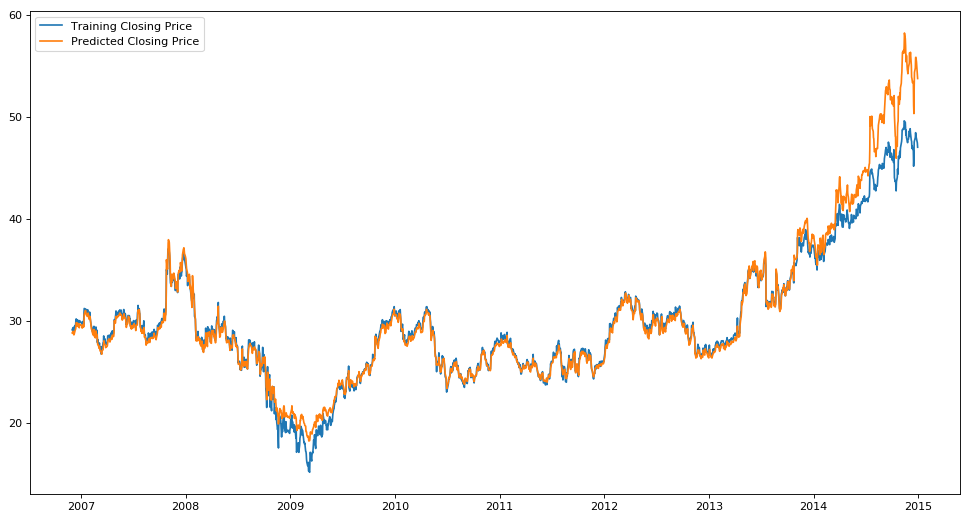

In [130]:
%matplotlib inline
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')

index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in micro['Date']]

plt.plot(index[:2033] ,m_train_y, label='Training Closing Price')
plt.plot(index[:2033] ,m_predict_train, label='Predicted Closing Price')
plt.legend()
_ = plt.ylim()

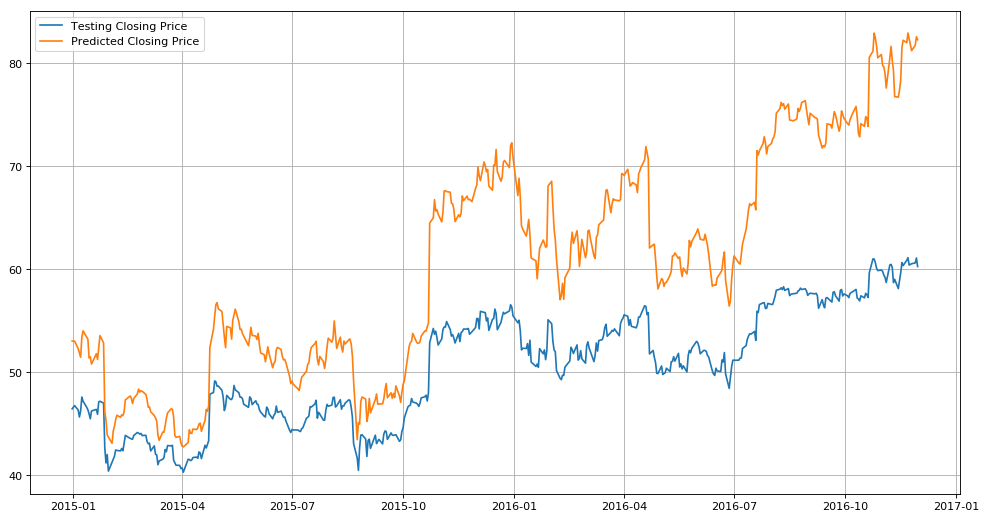

In [131]:
%matplotlib inline
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(index[2033:] ,m_test_y, label='Testing Closing Price')
plt.plot(index[2033:] ,m_predict_test, label='Predicted Closing Price')
plt.grid()
plt.legend()
_ = plt.ylim()